### DICOM to PNG conversion

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
import ast
from tqdm.auto import tqdm
import cv2
import os
import shutil
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [20]:
all_files = []
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        all_files.append(os.path.join(dirname, filename))

In [21]:
all_files

['train/f254d359e0ef/25aa6ddac5c0/84ebe17672e4.dcm',
 'train/0f37cd26d3a9/00607318e904/5022177a3ac8.dcm',
 'train/a03daefd7f50/46e2f92d9142/ef1a73df3463.dcm',
 'train/6fc05a848fc4/c322e2dc560a/ceff5e389de0.dcm',
 'train/7775226c7ce8/bc796fb417a9/a4cf0a951d9b.dcm',
 'train/285d0448622f/15ba0101c8f9/d908edf349ed.dcm',
 'train/724d6bc409ed/8d7036d22f06/307a239c069d.dcm',
 'train/ea3aaa187640/56b35e42f5af/a226584b9b79.dcm',
 'train/59a91c5701e6/b63b2808e34a/01e66c5fc9f3.dcm',
 'train/de7934b835ca/8938f04190e7/691e08460a87.dcm',
 'train/5a869900cfef/c56bc984ac1b/300b663f5b0e.dcm',
 'train/aee6f16805c5/95e787961bc4/66576b208730.dcm',
 'train/490545ad8409/12391b4052e0/5807a187f396.dcm',
 'train/bae29add20cf/6ceb0617712c/b452962df0ba.dcm',
 'train/39d2e8b3e170/ad4947e2f89f/63d91d1f0079.dcm',
 'train/33f2cae828db/112306c9cdc1/ed9855c3cf17.dcm',
 'train/7ea118331dfe/51e2f2abfde4/81965b5cb107.dcm',
 'train/7bb06ca2150c/e0824ae53d47/9bd0005d2873.dcm',
 'train/6de88cb78697/082fdb8a6318/e545e07a7a06

In [22]:
len(all_files)

6079

In [5]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path)
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

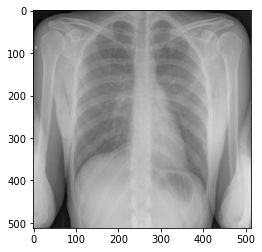

In [15]:
img = dicom2array(all_files[1000])
image = cv2.resize(img, (512,512))
plt.imshow(image,cmap="gray")
plt.show()

In [23]:
for directory in all_files:
    image = dicom2array(directory)
    image = cv2.resize(image, (512,512))
    im = Image.fromarray(image)
    im.save(directory.replace("dcm","png"))

In [25]:
#if you want to keep dicom files please DO NOT RUN THIS CELL
for directory in all_files:
    os.remove(directory)

In [4]:
all_files = []
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        all_files.append(os.path.join(dirname, filename))

In [6]:
all_files

['train/f254d359e0ef/25aa6ddac5c0/84ebe17672e4.png',
 'train/0f37cd26d3a9/00607318e904/5022177a3ac8.png',
 'train/a03daefd7f50/46e2f92d9142/ef1a73df3463.png',
 'train/6fc05a848fc4/c322e2dc560a/ceff5e389de0.png',
 'train/7775226c7ce8/bc796fb417a9/a4cf0a951d9b.png',
 'train/285d0448622f/15ba0101c8f9/d908edf349ed.png',
 'train/724d6bc409ed/8d7036d22f06/307a239c069d.png',
 'train/ea3aaa187640/56b35e42f5af/a226584b9b79.png',
 'train/59a91c5701e6/b63b2808e34a/01e66c5fc9f3.png',
 'train/de7934b835ca/8938f04190e7/691e08460a87.png',
 'train/5a869900cfef/c56bc984ac1b/300b663f5b0e.png',
 'train/aee6f16805c5/95e787961bc4/66576b208730.png',
 'train/490545ad8409/12391b4052e0/5807a187f396.png',
 'train/bae29add20cf/6ceb0617712c/b452962df0ba.png',
 'train/39d2e8b3e170/ad4947e2f89f/63d91d1f0079.png',
 'train/33f2cae828db/112306c9cdc1/ed9855c3cf17.png',
 'train/7ea118331dfe/51e2f2abfde4/81965b5cb107.png',
 'train/7bb06ca2150c/e0824ae53d47/9bd0005d2873.png',
 'train/6de88cb78697/082fdb8a6318/e545e07a7a06

In [28]:
len(all_files)

6079

Create new train directory for images

In [8]:
directory = 'train-512-png'
os.mkdir(directory)

Copy files to new directory

In [9]:
for file in all_files:
    shutil.copy(file, directory)